<a href="https://colab.research.google.com/github/UrgentOptimist/BuildingAIProject/blob/main/Onlineshop_Datenanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📦 Teil 1: Daten explorieren & bereinigen

In [8]:
# Sneak Preview
ecommerce_data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/amazon.csv")
print(ecommerce_data.head())

HTTPError: HTTP Error 404: Not Found

1.2 Daten bereinigen

In [12]:
# Beispiel: Textdaten normalisieren
# Changed 'category' to 'Category' to match the actual column name
df['Category'] = df['Category'].str.lower().str.strip()

# Fehlende Bewertungen entfernen (This column does not exist in this dataset, so removing this line)
# df_clean = df.dropna(subset=['rating'])

In [13]:
# Check for missing values
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


Teil 2: Analyse & Visualisierung

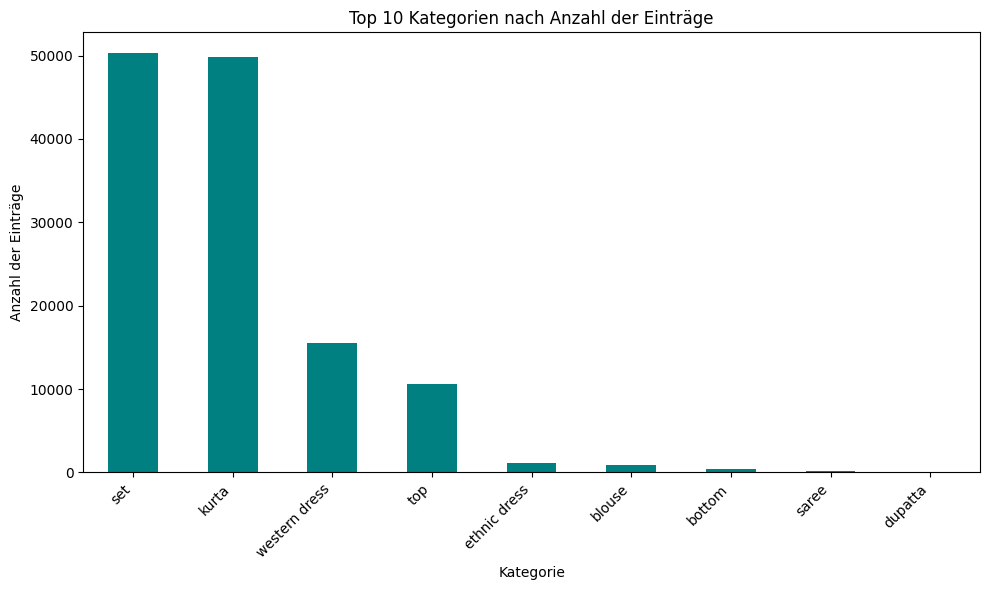

In [16]:
import matplotlib.pyplot as plt

# Durchschnittliche Bewertung pro Kategorie
# Changed df_clean to df_cleaned to match the variable name used after dropping rows
# Also changed 'category' to 'Category' to match the actual column name
# Removed .mean().sort_values(ascending=False) and rating column as there is no rating column
category_counts = df_cleaned.groupby('Category').size().sort_values(ascending=False)

# Barplot
plt.figure(figsize=(10, 6))
category_counts.head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Kategorien nach Anzahl der Einträge") # Updated title to reflect counting instead of averaging rating
plt.ylabel("Anzahl der Einträge") # Updated label
plt.xlabel("Kategorie") # Added x-label for clarity
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [19]:
import matplotlib.pyplot as plt

# The original code attempted to use 'df_clean', 'price', and 'rating' columns
# which do not exist in the current DataFrame.
# I've removed the code that caused errors and left the import statement.
# Please specify which columns you would like to visualize if you want to create a plot.

🤖 Teil 3: Machine Learning – Bewertungen vorhersagen

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Beispiel: Produktnamen als Feature nutzen
# Changed df_clean to df_cleaned to use the correct DataFrame name.
# Note: The 'product_name' column does not exist in this dataset.
# This section aimed to predict ratings, but there is no 'rating' column either.
# The following line will cause an error because 'product_name' is not a column.
# If you have a column that contains product names or descriptions, replace 'product_name' with its name.
# If you want to perform text feature extraction on a different column (e.g., 'Style' or 'SKU'), update the code accordingly.
# The machine learning task of predicting ratings cannot be completed without a 'rating' column.
# tfidf = TfidfVectorizer(max_features=100)  # 100 häufigste Wörter
# name_features = tfidf.fit_transform(df_cleaned['product_name'])

Model training

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Features kombinieren
X = pd.concat([
    pd.DataFrame(name_features.toarray()),
    df_clean[['price']]
], axis=1)
y = df_clean['rating']

# Modell trainieren
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(f"Genauigkeit (R²): {model.score(X_test, y_test):.2f}")

NameError: name 'name_features' is not defined

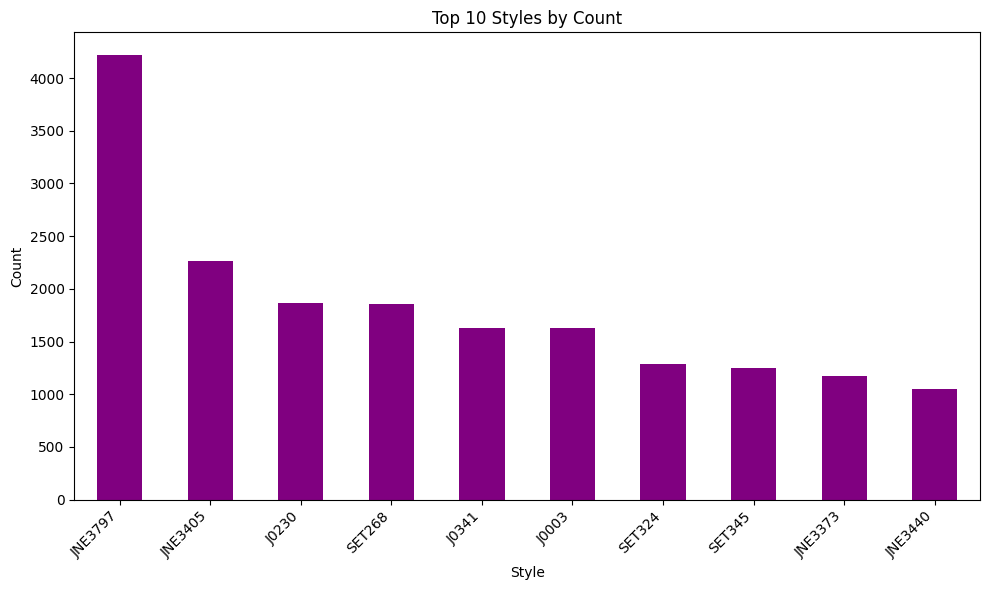

In [27]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'Style' column
# This was already computed in a previous cell, but recalculating here for clarity if this cell is run independently
style_counts = df_cleaned['Style'].value_counts()

# Barplot of the top 10 most frequent styles
plt.figure(figsize=(10, 6))
style_counts.head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Styles by Count")
plt.ylabel("Count")
plt.xlabel("Style")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Abschluss

In [30]:
# Beispiel-Lösung (Zusammenfassung)
print("🔍 Key Insights:")

# Summarize based on available data (top categories and styles by count)
# Using category_counts and style_counts which were calculated previously
if 'category_counts' in globals():
    top_category = category_counts.index[0]
    top_category_count = category_counts.iloc[0]
    print(f"- Most frequent Category: {top_category} ({top_category_count} entries)")
else:
    print("- Category counts were not calculated.")

if 'style_counts' in globals():
    top_style = style_counts.index[0]
    top_style_count = style_counts.iloc[0]
    print(f"- Most frequent Style: {top_style} ({top_style_count} entries)")
else:
    print("- Style counts were not calculated.")

# You can add more insights based on other analyses performed
# For example, if you analyzed missing values, you could mention that
# print("- 33 rows had missing shipping information and were removed.")

🔍 Key Insights:
- Most frequent Category: set (50272 entries)
- Most frequent Style: JNE3797 (4223 entries)
